In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../input/loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

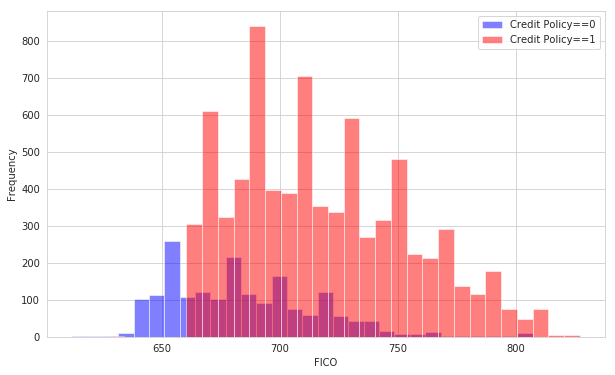

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit Policy==0')
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit Policy==1')
plt.legend()
plt.xlabel('FICO')

In [7]:
# More people with credit score = 1 than with credit score = 0
# People with less than 660(approx) FICO score will not meet the underwriting criteria

Text(0.5, 0, 'FICO')

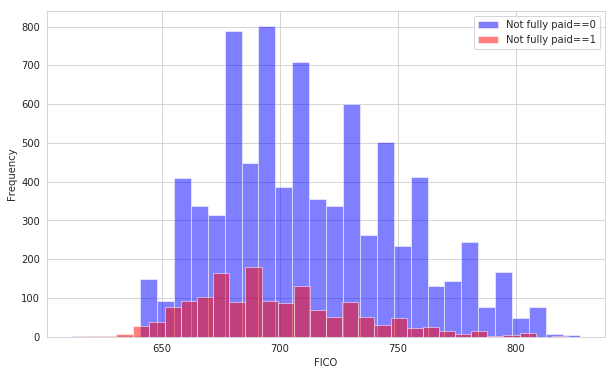

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Not fully paid==0')
df[df['not.fully.paid']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Not fully paid==1')
plt.legend()
plt.xlabel('FICO')

In [9]:
# More people fully paid their loan
# People with less than 660(approx) FICO score have not fully paid their loans

<Figure size 432x288 with 0 Axes>

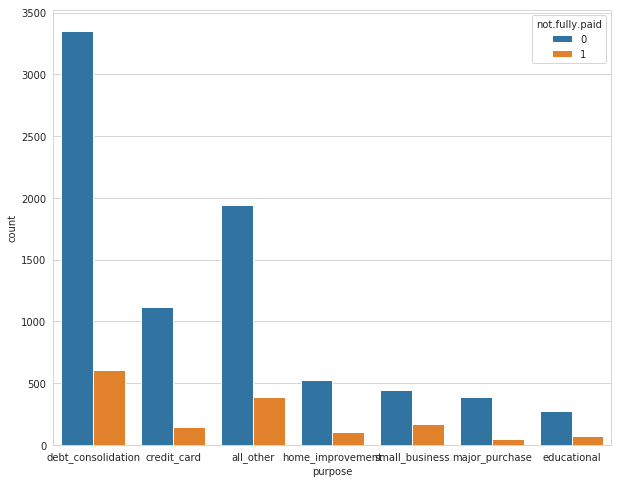

In [10]:
plt.tight_layout()
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

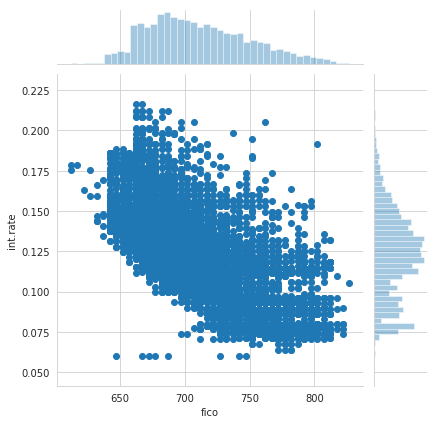

In [11]:

sns.jointplot(x='fico',y='int.rate',data=df)

<Figure size 792x504 with 0 Axes>

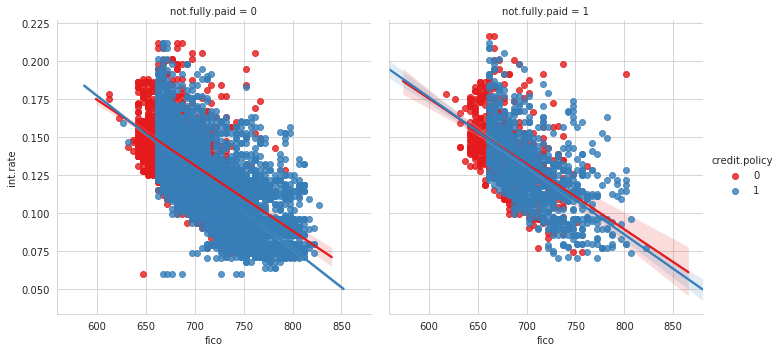

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',hue='credit.policy',palette='Set1')

In [13]:
#As the FICO score increases, better credit so the interest to be paid is decreases


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
cat_feats=['purpose']

In [16]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [17]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2325
           1       0.23      0.19      0.21       549

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.70      0.73      0.71      2874

[[1985  340]
 [ 446  103]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=600)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
r_pred = rfc.predict(X_test)

In [30]:
print(classification_report(r_pred,y_test))
print('\n')
print(confusion_matrix(r_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2859
           1       0.02      0.60      0.04        15

    accuracy                           0.85      2874
   macro avg       0.51      0.72      0.48      2874
weighted avg       0.99      0.85      0.91      2874



[[2425  434]
 [   6    9]]


In [31]:
#Random Forest with precision of 100%